![Adversarial example](adversarial_example.png "Adversarial example")

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch.nn as nn

In [3]:
from utils import MnistData
from models import ModelManager, ModelType

In [4]:
model_loaded = ModelManager.get_trained(ModelType.MnistCnnPatt)

In [5]:
data = MnistData(True)

In [6]:
step_size = 50 / 255

In [7]:
benign_images, labels = data.get_training_batch(100)

In [8]:
benign_images.requires_grad = True
if benign_images.grad is not None:
    benign_images.grad.zero_()
loss = nn.CrossEntropyLoss()(model_loaded(benign_images), labels)
loss.backward()
grad = benign_images.grad

In [9]:
altered_training_images = benign_images + step_size * grad.apply_(lambda x: 1 if x >= 0 else -1)

In [10]:
altered_training_images = altered_training_images.detach()
altered_training_images.apply_(lambda x: 1 if x> 1 else (0 if x < 0 else x))  # clip

tensor([[[[0.1961, 0.1961, 0.1961,  ..., 0.0000, 0.0000, 0.1961],
          [0.0000, 0.0000, 0.1961,  ..., 0.0000, 0.0000, 0.1961],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.1961],
          ...,
          [0.1961, 0.1961, 0.1961,  ..., 0.0000, 0.0000, 0.1961],
          [0.0000, 0.0000, 0.0000,  ..., 0.1961, 0.1961, 0.1961],
          [0.1961, 0.1961, 0.1961,  ..., 0.1961, 0.1961, 0.1961]]],


        [[[0.1961, 0.1961, 0.1961,  ..., 0.1961, 0.1961, 0.1961],
          [0.1961, 0.1961, 0.1961,  ..., 0.1961, 0.1961, 0.1961],
          [0.1961, 0.1961, 0.1961,  ..., 0.1961, 0.1961, 0.1961],
          ...,
          [0.1961, 0.1961, 0.1961,  ..., 0.1961, 0.1961, 0.1961],
          [0.1961, 0.1961, 0.1961,  ..., 0.1961, 0.1961, 0.1961],
          [0.1961, 0.1961, 0.1961,  ..., 0.1961, 0.1961, 0.1961]]],


        [[[0.1961, 0.1961, 0.1961,  ..., 0.1961, 0.1961, 0.1961],
          [0.1961, 0.1961, 0.1961,  ..., 0.1961, 0.1961, 0.1961],
          [0.1961, 0.1961, 0.1961,  ..

In [11]:
possible_adversarials = MnistData.get_adversarials(model_loaded, benign_images, labels, altered_training_images)
len(possible_adversarials)

28

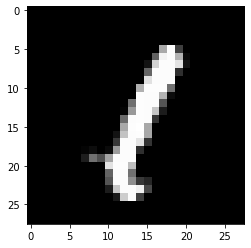

+++++


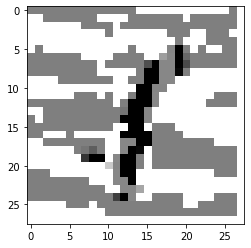

=====


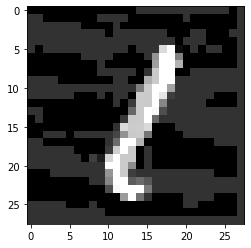

Label: 1, Prediction: 2, Confidence: 1.0
Original prediction: 1, Original confidence: 1.0


In [12]:
MnistData.show_adversarial(possible_adversarials, benign_images, altered_training_images, 0)

In [13]:
import numpy as np
from matplotlib import pyplot as plt

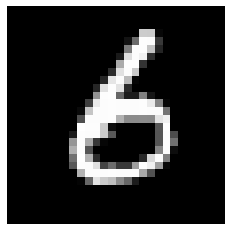

In [14]:
counter = 0
for adversarial in possible_adversarials:
    index = adversarial['Index']
    aexample = altered_training_images[index]
    aexample = aexample.detach()
    aexample = np.array(aexample * 255)
    plt.imshow(aexample.reshape(28, 28), cmap='gray')
    plt.axis("off")
    plt.savefig(f"AEXAMPLES\\FGSM\\ALTERED\\fgsm_altered_{counter}.png", bbox_inches="tight", pad_inches=0)
    bexample = benign_images[index]
    bexample = bexample.detach()
    bexample = np.array(bexample * 255)
    plt.imshow(bexample.reshape(28, 28), cmap='gray')
    plt.axis("off")
    plt.savefig(f"AEXAMPLES\\FGSM\\BENIGN\\fgsm_benign_{counter}.png", bbox_inches="tight", pad_inches=0)
    counter += 1